In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
training_pdfs = pd.read_parquet(r"/root/paperQA2_analysis/data/LitQA_data/train-00000-of-00001.parquet")
training_pdfs.head()

,id,question,ideal,distractors,canary,tag,version,sources,is_opensource,subtask,key-passage
0,e3b5a4af-41d9-48db-becf-29a08d0ad28e,Acinetobacter lwoffii has been evolved in the ...,ciproflaxin,"[meropenem, gentamicin, ampicillin]",BENCHMARK DATA SHOULD NEVER APPEAR IN TRAINING...,litqa,1.1-dev,[https://doi.org/10.1128/msphere.00109-24],True,litqa-v2-public,A. baumannii readily evolved resistance to mer...
1,76184ccf-4bf0-469e-a442-11d04b4ff8b0,Active olfactory receptor genes increase their...,2.7 fold,"[1.7 fold, 27 fold, 3.0 fold, 2.0 fold]",BENCHMARK DATA SHOULD NEVER APPEAR IN TRAINING...,litqa,1.1-dev,[https://doi.org/10.1038/s41586-023-06845-4],True,litqa-v2-public,"Furthermore, total contacts made to GIs showed..."
2,39129e1c-096f-4414-bf4f-37fadbbe364c,Among Cas9-disrupted loci in human neural stem...,61% of gene loci,"[61% of enhancer loci, 31% of gene loci, 31% o...",BENCHMARK DATA SHOULD NEVER APPEAR IN TRAINING...,litqa,1.1-dev,[https://doi.org/10.1016/j.celrep.2024.113693],True,litqa-v2-public,"Globally, disruptions within enhancers had com..."
3,27234279-f50c-4cfc-86e2-af68364a8f94,Approximately how many unique transposable ele...,"12,300","[4, 900, 39, 400, 2, 750, 2, 850]",BENCHMARK DATA SHOULD NEVER APPEAR IN TRAINING...,litqa,1.1-dev,[https://doi.org/10.1101/2022.03.19.484946],False,litqa-v2-public,"As a result, the SWO, mandarin, and pummelo ac..."
4,517e7cf8-c5d2-4391-9e2a-235b79d93050,Approximately what percentage of Drosophila wi...,80%,"[19%, 50%, 37%, 6%, 94%]",BENCHMARK DATA SHOULD NEVER APPEAR IN TRAINING...,litqa,1.1-dev,[https://doi.org/10.1101/2024.05.03.592390],True,litqa-v2-public,"In contrast with the results for H3.2, we foun..."


In [3]:
print(f"Number of training pdfs: {len(training_pdfs)}")

Number of training pdfs: 199


In [4]:
# Find the invalid DOIs
invalid_doi = [
    "https://doi.org/10.1016/j.jbior.2020.100740",
    "https://doi.org/10.1242/jcs.115.4.827",
    "https://doi.org/10.1101/2021.05.12.443709",
    "https://doi.org/10.1101/2021.07.10.451889",
    "https://doi.org/10.1080/14712598.2019.1685489",
    "https://doi.org/10.2147/CMAR.S262421",
    "https://doi.org/10.1002/(SICI)1097-0177(200006)218:2<235::AID-DVDY2>3.0.CO;2-G",
    "https://doi.org/10.1016/j.febslet.2014.11.036",
    "https://doi.org/10.1093/genetics/iyab101",
    "https://doi.org/10.1261/rna.034181.112",
    "https://doi.org/10.1038/s41586-019-1506-7",
    "https://doi.org/10.1126/science.aaw1219",
    "https://doi.org/10.1126/science.aba6500",
    "https://doi.org/10.1126/science.abf8761",
    "https://doi.org/10.1073/pnas.0403760101"    
]

print(f"Number of invalid pdfs: {len(invalid_doi)}")

Number of invalid pdfs: 15


In [5]:
def has_invalid_doi(sources):
    return any(doi in invalid_doi for doi in sources)

In [6]:
train_valid_pdfs = training_pdfs[~training_pdfs["sources"].apply(has_invalid_doi)]

output_path = r"/root/paperQA2_analysis/data/LitQA_data/train_valid.parquet"

train_valid_pdfs.to_parquet(output_path)

In [7]:
train_valid_pdfs_df = pd.read_parquet(output_path)
train_valid_pdfs_df.head()

,id,question,ideal,distractors,canary,tag,version,sources,is_opensource,subtask,key-passage
0,e3b5a4af-41d9-48db-becf-29a08d0ad28e,Acinetobacter lwoffii has been evolved in the ...,ciproflaxin,"[meropenem, gentamicin, ampicillin]",BENCHMARK DATA SHOULD NEVER APPEAR IN TRAINING...,litqa,1.1-dev,[https://doi.org/10.1128/msphere.00109-24],True,litqa-v2-public,A. baumannii readily evolved resistance to mer...
1,76184ccf-4bf0-469e-a442-11d04b4ff8b0,Active olfactory receptor genes increase their...,2.7 fold,"[1.7 fold, 27 fold, 3.0 fold, 2.0 fold]",BENCHMARK DATA SHOULD NEVER APPEAR IN TRAINING...,litqa,1.1-dev,[https://doi.org/10.1038/s41586-023-06845-4],True,litqa-v2-public,"Furthermore, total contacts made to GIs showed..."
2,39129e1c-096f-4414-bf4f-37fadbbe364c,Among Cas9-disrupted loci in human neural stem...,61% of gene loci,"[61% of enhancer loci, 31% of gene loci, 31% o...",BENCHMARK DATA SHOULD NEVER APPEAR IN TRAINING...,litqa,1.1-dev,[https://doi.org/10.1016/j.celrep.2024.113693],True,litqa-v2-public,"Globally, disruptions within enhancers had com..."
3,27234279-f50c-4cfc-86e2-af68364a8f94,Approximately how many unique transposable ele...,"12,300","[4, 900, 39, 400, 2, 750, 2, 850]",BENCHMARK DATA SHOULD NEVER APPEAR IN TRAINING...,litqa,1.1-dev,[https://doi.org/10.1101/2022.03.19.484946],False,litqa-v2-public,"As a result, the SWO, mandarin, and pummelo ac..."
4,517e7cf8-c5d2-4391-9e2a-235b79d93050,Approximately what percentage of Drosophila wi...,80%,"[19%, 50%, 37%, 6%, 94%]",BENCHMARK DATA SHOULD NEVER APPEAR IN TRAINING...,litqa,1.1-dev,[https://doi.org/10.1101/2024.05.03.592390],True,litqa-v2-public,"In contrast with the results for H3.2, we foun..."


In [8]:
print(f"NUmber of valid pdfs: {len(train_valid_pdfs_df)}")

NUmber of valid pdfs: 184


In [9]:
train_invalid_pdfs = training_pdfs[training_pdfs['sources'].apply(has_invalid_doi)]

output_path = r"/root/paperQA2_analysis/data/LitQA_data/train_invalid.parquet"

train_invalid_pdfs.to_parquet(output_path)


In [10]:
train_invalid_pdfs_df = pd.read_parquet(output_path)
train_invalid_pdfs_df.head()

,id,question,ideal,distractors,canary,tag,version,sources,is_opensource,subtask,key-passage
22,1e5f5199-84f4-4133-ab87-2372fa6ca722,Does the protein encoded by TDRD1 have symmetr...,No dimethylarginine,"[Symmetrical dimethylarginine modifications, A...",BENCHMARK DATA SHOULD NEVER APPEAR IN TRAINING...,litqa,1.1-dev,[https://doi.org/10.1261/rna.034181.112],True,litqa-v2-public,"Thus, we conclude that the TD1 domain of TDRD1..."
29,7cf0fcde-fea8-420c-8531-2f2fe9e38980,Has anyone assessed doing tagmentation of cDNA...,Yes,[No],BENCHMARK DATA SHOULD NEVER APPEAR IN TRAINING...,litqa,1.1-dev,[https://doi.org/10.1101/2021.07.10.451889],True,litqa-v2-public,Having demonstrated robust tagmentation over l...
38,0bac8974-554c-439a-a9a2-22fa509c8d5d,How is Bempegaldesleukin supposed to overcome ...,Preferentially binding to b2b3 complex over b1...,"[Improve PK via PEGylation, Overcome the Treg ...",BENCHMARK DATA SHOULD NEVER APPEAR IN TRAINING...,litqa,1.1-dev,[https://doi.org/10.1080/14712598.2019.1685489],True,litqa-v2-public,"we developed bempegaldesleukin, an engineered ..."
42,37a4d007-793e-4a89-922a-c1b05f4f82c1,How many Gly-X-Y repeats are in the collagenou...,14,"[2, 4, 15, 24, 34]",BENCHMARK DATA SHOULD NEVER APPEAR IN TRAINING...,litqa,1.1-dev,[https://doi.org/10.1073/pnas.0403760101],True,litqa-v2-public,"There are a total of 14, 34, 23, 23, 14, and 3..."
64,0a9d6516-95ef-4d7b-a28d-d7cde27b7b55,"In pre-commitment myeloid progenitor cells, fo...",72 hours,"[24 hours, 40 hours, 96 hours]",BENCHMARK DATA SHOULD NEVER APPEAR IN TRAINING...,litqa,1.1-dev,"[https://doi.org/10.1016/j.celrep.2021.109967,...",True,litqa-v2-public,"In contrast, after inactivating ER-HOXA9 for >..."


In [11]:
print(f"The length of the invalid pdfs = {len(train_invalid_pdfs_df)}")

The length of the invalid pdfs = 15


In [ ]:
test_pdfs = pd.read_parquet(r"/root/paperQA2_analysis/data/LitQA_data/test-00000-of-00001.parquet")
test_pdfs.head()

,id,question,ideal,distractors,canary,tag,version,sources,is_opensource,subtask,key-passage
0,e6ece709-c919-4388-9f64-ab0e0822b03a,Approximately what percentage of topologically...,31%,"[21%, 11%, 41%, 51%]",BENCHMARK DATA SHOULD NEVER APPEAR IN TRAINING...,litqa,1.1-dev,[https://doi.org/10.1038/s41467-024-44782-6],True,litqa-v2-test,Good control in FPR does not necessarily repre...
1,813a9053-3f67-4d58-80af-02153de90ae4,At least how long do SynNotch-MCF10DCIS cells ...,72 h,"[24, 48 h, 0 h, 12 h, 6 h, 96 h]",BENCHMARK DATA SHOULD NEVER APPEAR IN TRAINING...,litqa,1.1-dev,[https://doi.org/10.1073/pnas.2322688121],True,litqa-v2-test,Spatial heterogeneity within tumors due to var...
2,831621de-5e32-4006-af84-a40dba100866,DK015 and DK038 strains of Verticillium dahlia...,95%,"[94%, 96%, 97%, 98%]",BENCHMARK DATA SHOULD NEVER APPEAR IN TRAINING...,litqa,1.1-dev,[https://doi.org/10.1186/s12915-024-01900-6],True,litqa-v2-test,"The strains DK015 and DK038, with opposite MAT..."
3,3e6d7a54-5b8a-4aa0-ac6e-1fce986d1636,Expression of which of the following genes was...,Aldh1l1,"[MAPK, Actin, none of the above]",BENCHMARK DATA SHOULD NEVER APPEAR IN TRAINING...,litqa,1.1-dev,[https://doi.org/10.1073/pnas.2321711121],True,litqa-v2-test,The mitogen-activated protein kinase (MAPK) pa...
4,e4579ca5-c7d4-47a0-88f5-8adc460fc936,For which of the following Trub1 substrates di...,SCP2,"[FBXO5, HECTD1, NKAIN1, CCDC22, IDI1]",BENCHMARK DATA SHOULD NEVER APPEAR IN TRAINING...,litqa,1.1-dev,[https://doi.org/10.1101/2024.03.26.586895],True,litqa-v2-test,"Among the Trub1 substrates, FBXO5 (chr6:152975..."


In [13]:
print(f"NUmber of test pdfs: {len(test_pdfs)}")

NUmber of test pdfs: 49


In [14]:
test_valid_pdfs = test_pdfs[~test_pdfs['sources'].apply(has_invalid_doi)]

output_path = r"/root/paperQA2_analysis/data/LitQA_data/test_valid.parquet"

test_valid_pdfs.to_parquet(output_path)

In [ ]:
test_valid_pdfs_df = pd.read_parquet(output_path)
test_valid_pdfs_df.head()

,id,question,ideal,distractors,canary,tag,version,sources,is_opensource,subtask,key-passage
0,e6ece709-c919-4388-9f64-ab0e0822b03a,Approximately what percentage of topologically...,31%,"[21%, 11%, 41%, 51%]",BENCHMARK DATA SHOULD NEVER APPEAR IN TRAINING...,litqa,1.1-dev,[https://doi.org/10.1038/s41467-024-44782-6],True,litqa-v2-test,Good control in FPR does not necessarily repre...
1,813a9053-3f67-4d58-80af-02153de90ae4,At least how long do SynNotch-MCF10DCIS cells ...,72 h,"[24, 48 h, 0 h, 12 h, 6 h, 96 h]",BENCHMARK DATA SHOULD NEVER APPEAR IN TRAINING...,litqa,1.1-dev,[https://doi.org/10.1073/pnas.2322688121],True,litqa-v2-test,Spatial heterogeneity within tumors due to var...
2,831621de-5e32-4006-af84-a40dba100866,DK015 and DK038 strains of Verticillium dahlia...,95%,"[94%, 96%, 97%, 98%]",BENCHMARK DATA SHOULD NEVER APPEAR IN TRAINING...,litqa,1.1-dev,[https://doi.org/10.1186/s12915-024-01900-6],True,litqa-v2-test,"The strains DK015 and DK038, with opposite MAT..."
3,3e6d7a54-5b8a-4aa0-ac6e-1fce986d1636,Expression of which of the following genes was...,Aldh1l1,"[MAPK, Actin, none of the above]",BENCHMARK DATA SHOULD NEVER APPEAR IN TRAINING...,litqa,1.1-dev,[https://doi.org/10.1073/pnas.2321711121],True,litqa-v2-test,The mitogen-activated protein kinase (MAPK) pa...
4,e4579ca5-c7d4-47a0-88f5-8adc460fc936,For which of the following Trub1 substrates di...,SCP2,"[FBXO5, HECTD1, NKAIN1, CCDC22, IDI1]",BENCHMARK DATA SHOULD NEVER APPEAR IN TRAINING...,litqa,1.1-dev,[https://doi.org/10.1101/2024.03.26.586895],True,litqa-v2-test,"Among the Trub1 substrates, FBXO5 (chr6:152975..."


In [16]:
print(f"Number of valid test pdfs: {len(test_valid_pdfs_df)}")

Number of valid test pdfs: 49


In [17]:
test_invalid_pdfs = test_pdfs[test_pdfs['sources'].apply(has_invalid_doi)]

output_path = r"/root/paperQA2_analysis/data/LitQA_data/test_invalid.parquet"

test_invalid_pdfs.to_parquet(output_path)

In [18]:
test_invalid_pdfs_df = pd.read_parquet(output_path)
test_invalid_pdfs_df.head()

,id,question,ideal,distractors,canary,tag,version,sources,is_opensource,subtask,key-passage


In [19]:
print(f"Number of invalid test pdfs: {len(test_invalid_pdfs_df)}")

Number of invalid test pdfs: 0


In [20]:
combined_valid_pdfs = pd.concat([train_valid_pdfs, test_pdfs], ignore_index=True)

combined_valid_pdfs.head()

,id,question,ideal,distractors,canary,tag,version,sources,is_opensource,subtask,key-passage
0,e3b5a4af-41d9-48db-becf-29a08d0ad28e,Acinetobacter lwoffii has been evolved in the ...,ciproflaxin,"[meropenem, gentamicin, ampicillin]",BENCHMARK DATA SHOULD NEVER APPEAR IN TRAINING...,litqa,1.1-dev,[https://doi.org/10.1128/msphere.00109-24],True,litqa-v2-public,A. baumannii readily evolved resistance to mer...
1,76184ccf-4bf0-469e-a442-11d04b4ff8b0,Active olfactory receptor genes increase their...,2.7 fold,"[1.7 fold, 27 fold, 3.0 fold, 2.0 fold]",BENCHMARK DATA SHOULD NEVER APPEAR IN TRAINING...,litqa,1.1-dev,[https://doi.org/10.1038/s41586-023-06845-4],True,litqa-v2-public,"Furthermore, total contacts made to GIs showed..."
2,39129e1c-096f-4414-bf4f-37fadbbe364c,Among Cas9-disrupted loci in human neural stem...,61% of gene loci,"[61% of enhancer loci, 31% of gene loci, 31% o...",BENCHMARK DATA SHOULD NEVER APPEAR IN TRAINING...,litqa,1.1-dev,[https://doi.org/10.1016/j.celrep.2024.113693],True,litqa-v2-public,"Globally, disruptions within enhancers had com..."
3,27234279-f50c-4cfc-86e2-af68364a8f94,Approximately how many unique transposable ele...,"12,300","[4, 900, 39, 400, 2, 750, 2, 850]",BENCHMARK DATA SHOULD NEVER APPEAR IN TRAINING...,litqa,1.1-dev,[https://doi.org/10.1101/2022.03.19.484946],False,litqa-v2-public,"As a result, the SWO, mandarin, and pummelo ac..."
4,517e7cf8-c5d2-4391-9e2a-235b79d93050,Approximately what percentage of Drosophila wi...,80%,"[19%, 50%, 37%, 6%, 94%]",BENCHMARK DATA SHOULD NEVER APPEAR IN TRAINING...,litqa,1.1-dev,[https://doi.org/10.1101/2024.05.03.592390],True,litqa-v2-public,"In contrast with the results for H3.2, we foun..."


In [21]:
print(f"Length of full valid dataset: {len(combined_valid_pdfs)}")

Length of full valid dataset: 233


In [22]:
output_path = r"/root/paperQA2_analysis/data/LitQA_data/full_valid.parquet"

combined_valid_pdfs.to_parquet(output_path)

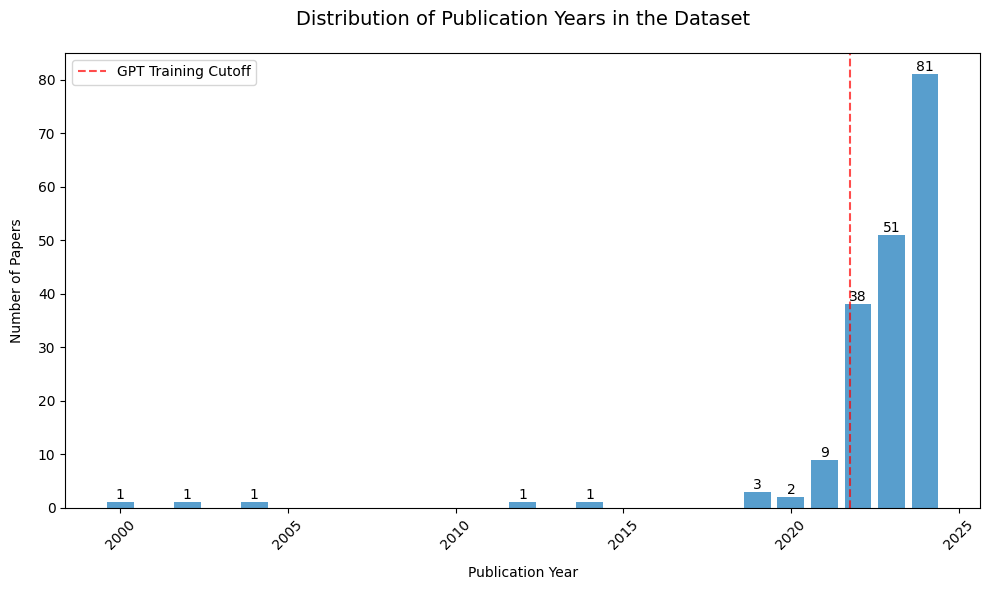

In [11]:
# Plot a bar chart of the years
years = pd.read_csv(r"/root/paperQA2_analysis/data/LitQA_data/paper_years.csv")
year_counts = years['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(year_counts.index, year_counts.values, color='#2E86C1', alpha=0.8)

plt.axvline(x=2021.75, color='red', linestyle='--', alpha=0.7, label='GPT Training Cutoff')

plt.title('Distribution of Publication Years in the Dataset', pad=20, fontsize=14)
plt.xlabel('Publication Year', labelpad=10)
plt.ylabel('Number of Papers', labelpad=10)

plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.legend()
plt.tight_layout()
plt.show()